# Applied Machine Learning: Assignment I

_Apurva Agrawal (axa177331)_


### Table of Contents:
1. Loading and Exploring Data 

2. Preparing train and test datasets

3. Linear Regression
    - cost, gradient descent and predict Functions
    - passing parameters and making predictions
    - Comparison of errors: Test vs Train
    
4. Logistic Regresion
    - cost, gradient descent and predict Functions
    - passing parameters and making predictions
    - Comparison of errors: Test vs Train

5. Experiments
    - Changing model parameters
    - random variables test
    - thoughtful variables test

6. Discussion

## Importing libraries

In [1]:
# Import libraries
import csv
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Reading csv file

In [2]:
raw_data=pd.read_csv("student-mat.csv", sep=';')
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Exploring Data 

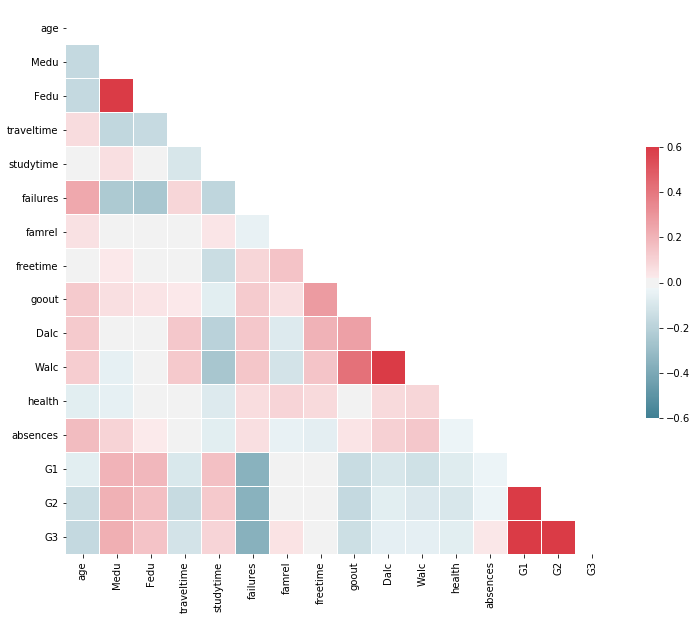

In [3]:
# Compute the correlation matrix
corr = raw_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax = 0.6, vmin =-0.6)


### Creating dummies and feature scaling (not 'G3', dropping 'G1','G2')

In [4]:
#numeric columns
raw_num = raw_data.select_dtypes(exclude=[object])
#categorical columns
raw_cat = raw_data.select_dtypes(include=[object])
#creating dummies for categorical columns
raw_enc = pd.get_dummies(raw_cat)
#joining to get raw_data with dummies
raw_dum = raw_num.join(raw_enc)
#dropping G1 and G2
data_g3=raw_dum.drop(['G1','G2'], axis=1)
data_g3.head()

#feature scaling (not G3)
scaler = MinMaxScaler()
data_g3[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']] =scaler.fit_transform(data_g3[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']])
data_g3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1,0,0,1,0,1,1,0,1,0


#### features dataframe

In [5]:
df_X = data_g3.drop(['G3'],axis=1)
df_X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1,0,0,1,0,1,1,0,1,0


#### target variable dataframe

In [6]:
df_y = data_g3['G3']
df_y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

### Train and test datasets for Linear Regression

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 2)

# inserting intercept only to make matrix based calculations
X_train.insert(0, "intercept",1) 
X_test.insert(0, "intercept",1) 

# converting to arrays for efficiency
X_train = X_train.values
X_test = X_test.values
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()



### Defining cost , gradient descent and predict funtion for Linear Regression

In [8]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J



def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        # Hypothesis Values
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        # Difference b/w Hypothesis and Actual Y
        gradient = X.T.dot(loss)/m
        # Changing Values of theta using Gradient
        theta = theta - alpha*gradient
        # New Cost Value
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

def predict(X):
    """
    This function will predict target values given model parameters
    """
   
    
    return X.dot(t)


### Model Parameters for Linear Regression

In [9]:
# Intializing Model Parameters

theta = np.zeros(57)

m = len(y_train)

iterations = 2000           #Iterations
alpha = 0.00000001          #Learning rate

### Calling gradient descent function

In [10]:
(t,c) = gradient_descent(X_train,y_train,theta,alpha, iterations) # t is the theta values and c is the costs
y_pred_train = predict(X_train)
y_pred_test = predict(X_test)

### Comparing performance

In [11]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Training set MSE is {}' .format(round(mse_train, 3)))
print('Testing set MSE is {}' .format(round(mse_test, 3)))

Training set MSE is 132.37
Testing set MSE is 122.352


###  Logistic Regression

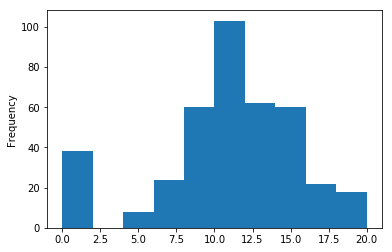

In [12]:
# plot G3 to see the distribution to decide the value for distinguishing class
data_g3['G3'].plot.hist()

In [13]:
# mean and median of G3
median = np.median(y_train)
mean = np.mean(y_train)
print(median)
print(mean)


11.0
10.503623188405797


In [14]:
# converting target variable to categorical
y_train_lr = np.where(y_train > 7, 1, 0)                   # tried different values and retained this coz of better results
y_test_lr = np.where(y_test > 7, 1, 0)                     

### Defining cost , gradient descent and predict funtion for Logistic Regression

In [15]:
def sigmoid(X, theta):
    
    z = np.dot(X, theta[1:]) + theta[0]
    
    return 1.0 / ( 1.0 + np.exp(-z))


# Define Logistic Regression Cost Function
def lrCostFunction(y, hx):
  
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    
    return j

# Gradient Descent function to minimize the Logistic Regression Cost Function.
def lrGradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        
        cost.append(lrCostFunction(y, hx))
        
    return cost, theta        

# Prediction function
def lrPredict(X):
    
    return np.where(sigmoid(X,theta) >= 0.5, 1, 0)


In [16]:
# m = Number of training examples
# n = number of features
m, n = X_train.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.0001
num_iter = 2000

### Calling gradient descent function

In [17]:
# Gradient descent
(cost,theta) = lrGradient(X_train, y_train_lr, theta, alpha, num_iter)
# Last value of the cost is the minimum available cost
cost[-1]

# Predictions
y_pred_train_lr = lrPredict(X_train)
y_pred_test_lr = lrPredict(X_test)

### Comparing performance

In [18]:
f1_test_lr = f1_score(y_test_lr, y_pred_test_lr, average='micro')
f1_train_lr = f1_score(y_train_lr, y_pred_train_lr, average='micro')

print('Training set f1 score is {}' .format(round(f1_train_lr, 3)))
print('Testing set f1 score is {}' .format(round(f1_test_lr, 3)))

Training set f1 score is 0.826
Testing set f1 score is 0.874


## Experimenatation with model parameters

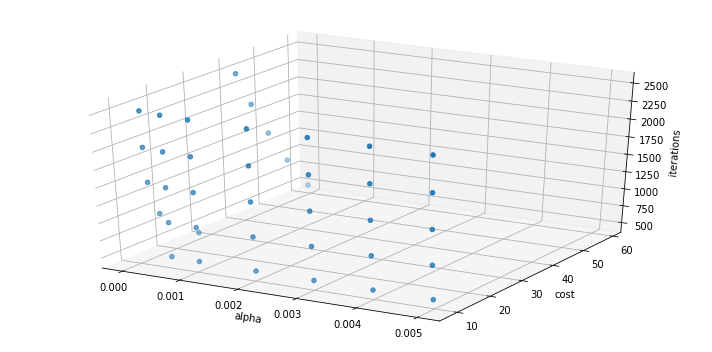

In [19]:
## Linear regression
alpha_c = [0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0.0001, 0.00001]
iterations_c = [500, 1000, 1500, 2000, 2500]
x1 = []
y1 = []
mse1 = []

for alph in range(0, len(alpha_c)):
        for k in range(0, len(iterations_c)):
            theta = np.zeros(57)
            iterations = iterations_c[k]
            alpha = alpha_c[alph]
            (t,c) = gradient_descent(X_train,y_train,theta,alpha, iterations)
            x1.append(alpha_c[alph])
            y1.append(iterations_c[k])
            mse1.append(c[-1])


fig = plt.figure(figsize = (10,5))
#Linear Regression plot
ax1 = plt.axes(projection='3d')
ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#Data for a three-dimensional line
ax1.scatter3D(x1, mse1, y1)

ax1.set_xlabel('alpha')
ax1.set_ylabel('cost')
ax1.set_zlabel('iterations')
plt.tight_layout()

In [20]:
result = list(zip(x1,y1,mse1))
result = pd.DataFrame(result)
result

,0,1,2
0,0.00500,500,9.434318
1,0.00500,1000,8.926396
2,0.00500,1500,8.678630
3,0.00500,2000,8.535252
4,0.00500,2500,8.443779
5,0.00400,500,9.606676
6,0.00400,1000,9.081367
7,0.00400,1500,8.808992
8,0.00400,2000,8.643997
9,0.00400,2500,8.535272


In [21]:
min(mse1)

8.443779398739037

#### min cost funtion: 8.4438; alpha = 0.005, no. of iterations = 2500 

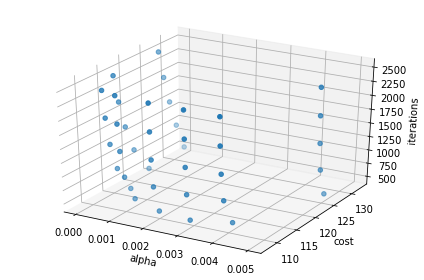

In [22]:
# Logistic Regression
x2 = []
y2 = []
mse2 = []

for alph in range(0, len(alpha_c)):
        for k in range(0, len(iterations_c)):
            theta = np.zeros(58)
            iterations = iterations_c[k]
            alpha = alpha_c[alph]
            (cost, theta) = lrGradient(X_train, y_train_lr, theta, alpha, iterations)
            mse2.append(cost[-1])
            x2.append(alpha_c[alph])
            y2.append(iterations_c[k])


#Logistic Regression plot
ax2 = plt.axes(projection='3d')
ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#Data for a three-dimensional line
ax2.scatter3D(x2, mse2, y2)

ax2.set_xlabel('alpha')
ax2.set_ylabel('cost')
ax2.set_zlabel('iterations')
plt.tight_layout()

In [23]:
result_lr = list(zip(x1,y1,mse2))
result_lr = pd.DataFrame(result_lr)
result_lr

,0,1,2
0,0.00500,500,125.637141
1,0.00500,1000,124.362457
2,0.00500,1500,123.980240
3,0.00500,2000,123.792324
4,0.00500,2500,123.682168
5,0.00400,500,110.914792
6,0.00400,1000,108.711768
7,0.00400,1500,108.086767
8,0.00400,2000,107.834694
9,0.00400,2500,107.762776


In [24]:
min(mse2)

107.76277619765438

#### min cost funtion: 107.7627 ; alpha = 0.004, no. of iterations = 2500 

## Experiment using 10 random features

In [25]:
# randomly selecting 10 features
df_X_xp1 = df_X.iloc[:,21:31] 

X_train_xp1,X_test_xp1,y_train_xp1,y_test_xp1 = train_test_split(df_X_xp1,df_y,test_size=0.3, random_state = 3)

## Add a columns of 1s as intercept to X
X_train_xp1.insert(0, "intercept",1) 
X_test_xp1.insert(0, "intercept",1)             

X_train_xp1_li = X_train_xp1.values
X_test_xp1_li= X_test_xp1.values

y_train_xp1_li = np.array(y_train_xp1).flatten()                              
y_test_xp1_li = np.array(y_test_xp1).flatten()                                

df_X_xp1.head() # random
          

,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other
0,1,0,1,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1


10.5
10.340579710144928


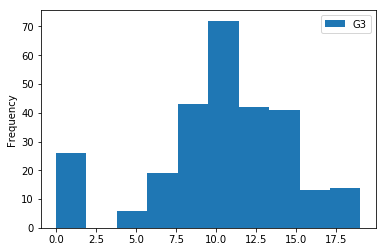

In [26]:
# mean and median of G3
median = np.median(y_train_xp1)
mean = np.mean(y_train_xp1)
print(median)
print(mean)
y_train_xp1 = pd.DataFrame(y_train_xp1)
y_train_xp1.plot.hist()


In [27]:
y_train_lr_xp1 = np.where(y_train_xp1_li > 7, 1, 0)        #For logistic regression
y_test_lr_xp1 = np.where(y_test_xp1_li > 7, 1, 0)

### Linear Regression

In [28]:
# initialize theta(weights) parameters to zeros
theta = np.zeros(11)
m = len(y_train_xp1)
iterations = 2500
alpha = 0.005


(t,c) = gradient_descent(X_train_xp1_li,y_train_xp1_li,theta,alpha, iterations)
y_pred_train_xp1 = predict(X_train_xp1)
y_pred_test_xp1 = predict(X_test_xp1)

# Commparing performance
mse_test_xp1 = mean_squared_error(y_test_xp1, y_pred_test_xp1)
mse_train_xp1 = mean_squared_error(y_train_xp1, y_pred_train_xp1)

print('Training set MSE is {}' .format(round(mse_train_xp1, 5)))
print('Training set MSE (using all attributes) is {}' .format(round(mse_train, 5)))
print('Testing set MSE is {}' .format(round(mse_test_xp1, 5)))
print('Testing set MSE (using all attributes) is {}' .format(round(mse_test, 5)))

Training set MSE is 19.69644
Training set MSE (using all attributes) is 132.3702
Testing set MSE is 22.09864
Testing set MSE (using all attributes) is 122.35247


## Logistic Regression

In [29]:
# m = Number of training examples
# n = number of features
m, n = X_train_xp1.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.0001
num_iter = 2500


# Gradient descent
(cost,theta) = lrGradient(X_train_xp1_li, y_train_lr_xp1, theta, alpha, num_iter)
# Last value of the cost is the minimum available cost
cost[-1]

# Predictions
y_pred_train_lr_xp1 = lrPredict(X_train_xp1)
y_pred_test_lr_xp1 = lrPredict(X_test_xp1)

# Accuracy Measure
f1_test_lr_xp1 = f1_score(y_test_lr_xp1, y_pred_test_lr_xp1, average='micro')
f1_train_lr_xp1 = f1_score(y_train_lr_xp1, y_pred_train_lr_xp1, average='micro')

print('Training set F1 is {}' .format(round(f1_train_lr_xp1, 5)))
print('Training set F1 score (using all attributes) is {}' .format(round(f1_train_lr, 5)))
print('Testing set F1 is {}' .format(round(f1_test_lr_xp1, 5)))
print('Testing set F1 score (using all attributes) is {}' .format(round(f1_test_lr, 5)))

Training set F1 is 0.81522
Training set F1 score (using all attributes) is 0.82609
Testing set F1 is 0.84034
Testing set F1 score (using all attributes) is 0.87395


## Experiment using 10 deliberate features

In [30]:
# selecting features which intutively look more relevant for grades
df_X_xp2 = df_X[['age','Medu','Fedu','studytime','failures','famrel','freetime','Dalc','health','absences']] 

X_train_xp2,X_test_xp2,y_train_xp2,y_test_xp2 = train_test_split(df_X_xp2,df_y,test_size=0.3, random_state = 4)

## Add a columns of 1s as intercept to X
X_train_xp2.insert(0, "intercept",1) 
X_test_xp2.insert(0, "intercept",1)                        #Only to be used for experiment 2

X_train_xp2_lr = X_train_xp2.values
X_test_xp2_lr= X_test_xp2.values

y_train_xp2_lr = np.array(y_train_xp2).flatten()                              #For linear regression
y_test_xp2_lr = np.array(y_test_xp2).flatten()                                #For linear regression


df_X_xp2.head() # random


,age,Medu,Fedu,studytime,failures,famrel,freetime,Dalc,health,absences
0,0.428571,1.00,1.00,0.333333,0.0,0.75,0.50,0.00,0.5,0.080000
1,0.285714,0.25,0.25,0.333333,0.0,1.00,0.50,0.00,0.5,0.053333
2,0.000000,0.25,0.25,0.333333,1.0,0.75,0.50,0.25,0.5,0.133333
3,0.000000,1.00,0.50,0.666667,0.0,0.50,0.25,0.00,1.0,0.026667
4,0.142857,0.75,0.75,0.333333,0.0,0.75,0.50,0.00,1.0,0.053333


11.0
10.71376811594203


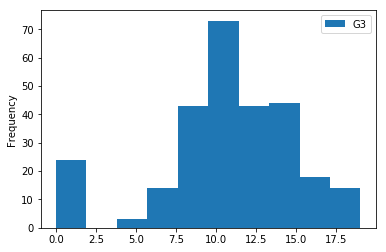

In [31]:
# mean and median of G3
median = np.median(y_train_xp2)
mean = np.mean(y_train_xp2)
print(median)
print(mean)
y_train_xp2 = pd.DataFrame(y_train_xp2)
y_train_xp2.plot.hist()

In [32]:
y_train_lr_xp2_lr = np.where(y_train_xp2_lr > 7, 1, 0)        #For logistic regression
y_test_lr_xp2_lr = np.where(y_test_xp2_lr > 7, 1, 0)      

## Linear Regression

In [33]:
# initialize theta(weights) parameters to zeros
theta = np.zeros(11)
m = len(y_train_xp2)
iterations = 2500
alpha = 0.005


(t,c) = gradient_descent(X_train_xp2_lr,y_train_xp2_lr,theta,alpha, iterations)
y_pred_train_xp2 = predict(X_train_xp2)
y_pred_test_xp2 = predict(X_test_xp2)

# Accuracy Measure
mse_test_xp2 = mean_squared_error(y_test_xp2, y_pred_test_xp2)
mse_train_xp2 = mean_squared_error(y_train_xp2, y_pred_train_xp2)

print('Training set MSE is {}' .format(round(mse_train_xp2, 3)))
print('Training sMSE (using all attributes) is {}' .format(round(mse_train, 3)))
print('Testing set MSE is {}' .format(round(mse_test_xp2, 3)))
print('Testing set MSE (using all attributes) is {}' .format(round(mse_test, 3)))

Training set MSE is 18.447
Training sMSE (using all attributes) is 132.37
Testing set MSE is 20.319
Testing set MSE (using all attributes) is 122.352


## Logistic Regression

In [34]:
# m = Number of training examples
# n = number of features
m, n = X_train_xp2.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.0001
num_iter = 2500


# Gradient descent
(cost,theta) = lrGradient(X_train_xp2_lr, y_train_lr_xp2_lr, theta, alpha, num_iter)
# Last value of the cost is the minimum available cost
cost[-1]

# Predictions
y_pred_train_lr_xp2 = lrPredict(X_train_xp2)
y_pred_test_lr_xp2 = lrPredict(X_test_xp2)

# Accuracy Measure
f1_test_lr_xp2 = f1_score(y_test_lr_xp2_lr, y_pred_test_lr_xp2, average='micro')
f1_train_lr_xp2 = f1_score(y_train_lr_xp2_lr, y_pred_train_lr_xp2, average='micro')

print('Training set F1 is {}' .format(round(f1_train_lr_xp2, 5)))
print('Training set F1 score (using all attributes) is {}' .format(round(f1_train_lr, 5)))
print('Testing set F1 is {}' .format(round(f1_test_lr_xp2, 5)))
print('Testing set F1 score (using all attributes) is {}' .format(round(f1_test_lr, 5)))

Training set F1 is 0.85145
Training set F1 score (using all attributes) is 0.82609
Testing set F1 is 0.7563
Testing set F1 score (using all attributes) is 0.87395


## Discussion:

Let's tabulate the results of *experiment 1* and *experiment 2* before we enter into the discussion:

                               ________________________________________________________
                               |        Linear(MSE)      |      Logistic(F1 Score)    |
                               |______________________________________________________|
                               |  Training  |  Testing   |  Training   |   Testing    |
      _________________________|------------|------------|-------------|--------------|
      |With all attributes     |   132.37   |   122.352  |   0.82609   |   0.87395    |
      |10 random attributes    |   19.6966  |   22.098   |   0.81522   |   0.84034    |
      |10 thoughtful attributes|    18.447  |   20.319   |   0.85145   |   0.7563     |
      ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Linear Regression:

If we look at the mean squared errors, regression with all the attributes, with very small alpha, seems to have significant magnitude of mse, but work little better on testing dataset. On the contrary, regression with 10 thoughtful attributes and lower alpha as compared to earlier, seems to be generalizing nicely. Regression with 10 random attributes performs similarly. Nevertheless, none of these models are appropriate and attributes can be squared or log transformed to incorporate interaction effects and get better results .

### Logistic Regression:

All the logistic regressions provide better result as the dataset and problem is better suited for classification problem.

Model with all the attributes provides fairly good F1 score in both training and testing data-sets. Model with 10 random attributes seem to be performing better only by chance. Model with thoughtful variables comprised all numeric variables and thus classification model for this particular sample of test dataset did not match model with all attributes. However, different features do give different results but to show all the results is beyond scope as of now for this document.

## Effect of number of iterations, alpha and cost functions:

Varying number of iterations, choosing the learning parameter alpha for gradient descent and choosing the cost funtion affect how well the model performs. Choosing the value of alpha and number of iterations where the defined cost function achieves minima gives the best results for the given features. (The same has been incorporated in the code above.)

## Choosing threshold for converting linear to classification problem:

For this assignment, the threshold has been decided based on the distribution of the target varaible and considering the descriptive statistics of the variable. The better way could have been to plot the metrics like ROC which involves assigning costs to the classifications, which has not been provided for and thus beyond scope.



###### End of code and report